Load libraries

In [1]:
library(ggplot2)
library(forcats)
library(dplyr)
library(data.table)
#library(tidyverse)
library(ggtext)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




ERROR: Error in library(ggtext): there is no package called ‘ggtext’


Set working directory

In [2]:
here::i_am("figures-from-tables/fire-history-figure.ipynb")

here() starts at /home/jferrer/proyectos/fireveg/fireveg-analysis



In [3]:
fh_table <- readRDS(here::here("data","fire-history.rds"))

In [7]:
fh_table <- fh_table %>% mutate(site_label=factor(site_label))

In [8]:
qd_table <- readRDS(here::here("data","Quadrat-sample-data.rds"))

In [9]:
qd_table %>% head

visit_id   visit_date sample_nr sample_method quadrat_area min_fire_date
1 CRC09B7UVH 2021-02-03 1         NA            NA           2020-02-10   
2 CRC09B7UVH 2021-02-03 1         NA            NA           2020-02-10   
3 CRC09B7UVH 2021-02-03 1         NA            NA           2020-02-10   
4 CRC09B7UVH 2021-02-03 1         NA            NA           2020-02-10   
5 CRC09B7UVH 2021-02-03 1         NA            NA           2020-02-10   
6 CRC09B7UVH 2021-02-03 1         NA            NA           2020-02-10   
  max_fire_date species               species_code resprout_organ ⋯
1 2020-02-10    Goodenia ovata        3192         NA             ⋯
2 2020-02-10    Gonocarpus tetragynus 3247         NA             ⋯
3 2020-02-10    Eucalyptus blaxlandii 4058         NA             ⋯
4 2020-02-10    Eucalyptus viminalis  4197         NA             ⋯
5 2020-02-10    Pteridium esculentum  6403         NA             ⋯
6 2020-02-10    Opercularia aspera    5697         None           ⋯
  adults_unburnt resprouts_live resprouts_died resprouts_kill
1 0                0            NA             NA            
2 0              100            NA             NA            
3 0                0            NA             NA            
4 0                0            NA             NA            
5 0               32            NA             NA            
6 0                0            NA             NA            
  resprouts_reproductive recruits_live recruits_died recruits_reproductive
1 0                      100           NA            0                    
2 0                        0           NA            0                    
3 0                       16           NA            0                    
4 0                        1           NA            0                    
5 0                        0           NA            0                    
6 0                        4           NA            0                    
  scorch life_stage
1 NA     NA        
2 NA     NA        
3 NA     NA        
4 NA     NA        
5 NA     NA        
6 NA     NA

In [ ]:

#######Load the files  #######
#Species and traits data
my.table <- read.csv("database_fire_20200530.csv",sep=",",
                     header=T, dec=".", stringsAsFactors=F, na.strings=c("","NA", "N/A"))

#Fire data
my.fire<- read.csv("my.fire_20200316.csv",sep=",",
                     header=T, dec=".", stringsAsFactors=F, na.strings=c("","NA", "N/A"))
my.fire$visit_id <- as.factor(my.fire$visit_id)
#Subset only the last fire
#my.fire2<-my.fire[c(1,4,5, 10,12,15,18, 22,26,27,34,35,38,43),]

####Calculate traits from field data###########

tmp <- my.table %>% distinct(species, .keep_all = TRUE)
tmp <- tmp[!is.na(tmp$species), ]
dim(tmp) #84 spp.
tmp$species

#Select resprouter species
resprout_organ3 <- data.frame(tmp$species, tmp$resprout_organ)
colnames(resprout_organ3)<-c("species1", "resprout_organ")
str(resprout_organ3)

#Seedbank
seedbank3 <- data.frame(tmp$species, tmp$seedbank)
colnames(seedbank3)<-c("species", "seedbank")
str(seedbank3)

#N total live resprouts
N1<- as.data.frame(aggregate(my.table$resprouts_live, list(my.table$species), sum))
colnames(N1)<-c("species", "N1")
dim(N1)

#N reproductive live resprouts
N2<- as.data.frame(aggregate(my.table$resprouts_reproductive, list(my.table$species), sum))
colnames(N2)<-c("species", "N2")

#N total live recruits
N5<- as.data.frame(aggregate(my.table$recruits_live, list(my.table$species), sum))
colnames(N5)<-c("species", "N5")

#N reproductive live recruits
N6<- as.data.frame(aggregate(my.table$recruits_reproductive, list(my.table$species), sum))
colnames(N6)<-c("species", "N6")

#N Dead sprouts
N7<- as.data.frame(aggregate(my.table$resprouts_died, list(my.table$species), sum))
colnames(N7)<-c("species", "N7")

#N dead recruits
N8<- as.data.frame(aggregate(my.table$recruits_died, list(my.table$species), sum))
colnames(N8)<-c("species", "N8")

#N fire killed (resprouts?)
N9<- as.data.frame(aggregate(my.table$resprouts_kill, list(my.table$species), sum))
colnames(N9)<-c("species", "N9")
dim(N9)

#Combine in a data frame
plant.traits <-cbind.data.frame(seedbank3, resprout_organ3, N1, N2, N5, N6, N7, N8, N9)
str(plant.traits)
#Delete column species
drops <- c("species", "plant_species")
plant.traits <-plant.traits[ , !(names(plant.traits) %in% drops)]
#rhizoma.traits["species"] <- NULL

#Species characteristics
plant.traits$n.fire.mortality <- (plant.traits$N1 + plant.traits$N7 + plant.traits$N9)
plant.traits$fire.mortality <- (100*plant.traits$N9)/(plant.traits$N1 + plant.traits$N7 + plant.traits$N9)
plant.traits$n.sprout.surv <-(plant.traits$N1 + plant.traits$N7)
plant.traits$sprout.surv <- (100*plant.traits$N1)/(plant.traits$N1 + plant.traits$N7)
plant.traits$seed_adult <- (plant.traits$N5 + plant.traits$N8)/(plant.traits$N1 + plant.traits$N7)
plant.traits$n.recruit.surv <- (plant.traits$N5 + plant.traits$N8) 
plant.traits$recruit.surv <- (100*plant.traits$N5)/(plant.traits$N5 + plant.traits$N8) 
plant.traits$n.reprod.resprout <- plant.traits$N2
plant.traits$reprod.resprout <- (100*plant.traits$N2)/(plant.traits$N2 + plant.traits$N1) 
plant.traits$n.reprod.recruit <-plant.traits$N6 # the formula said N5 but this is the number of lives recruits
plant.traits$reprod.recruit <- 100*(plant.traits$N6/plant.traits$N5)
plant.traits$surv.dens <- (plant.traits$N2/625)
plant.traits$recruit.dens <-(plant.traits$N5/625)

str(plant.traits)
plant.traits <- plant.traits[!is.na(plant.traits$resprout_organ), ]
plant.traits <- plant.traits[!is.na(plant.traits$seedbank), ]

#write.csv(plant.traits, "plant.traits.csv")


#####
#Dumbbell Plot to visualize relative positions 
#(like growth and decline) between two points in time.

my.spp<- data.frame(species = my.table$species,
                    visit_id = my.table$visit_id,
                    N2_tf = my.table$resprouts_reproductive,
                    N5_tf = my.table$recruits_live,
                    resprout_organ = my.table$resprout_organ)

str(my.spp)
#Now merge with fire information
my.time<- merge(my.spp, my.fire, by = "visit_id")
my.time[1:5,]

###Fire frequency
my.fire %>%
  pivot_longer(cols = c(visit_date, fire_date)) %>% #get into long format
  rename(Event = name,
         Date = value) %>% 
  mutate
  pivot_wider(names_from = Event, values_from = Date) 
  
  
ggplot(my.fire) +
  geom_segment(data =my.fire, aes(x = fire_date, y = visit_id,
                   yend = visit_id, xend = visit_date),
               color = "blue",
               size = 3, #Note that I sized the segment to fit the points
               alpha = .2) +
  geom_point(aes(x = fire_date, y = visit_id), size = 4, show.legend = TRUE)


prueba %>%
  ggplot(aes(x = days_since_fire, y = visit_id)) +
           geom_line(aes(group = Event))+
           geom_point(aes(color = Event), size=4) +
           theme(legend.position="top")

         







####
#SEEDERS SPECIES
####
ggplot(my.time, aes(N5_tf, days_since_fire)) +
  geom_segment(aes(x = 0, y = days_since_fire, xend = N5_tf, 
                   yend = days_since_fire), color = "grey50", size = 0.5) +
  geom_point(size = 1) + coord_flip()

table(my.time$species, my.time$N5_tf>1)

#Pultenaea blakelyi
ggplot(subset(my.time, species %in% c("Pultenaea blakelyi")), aes(N5_tf, days_since_fire)) +
  geom_segment(aes(x = 0, y = days_since_fire, xend = N5_tf, 
                   yend = days_since_fire), color = "grey50", size = 0.5) +
  geom_point(size = 1) + coord_flip() + 
  labs(title = "Pultenaea blakelyi", subtitle = "Total of live recruits")

#Entolasia marginata
ggplot(subset(my.time, species %in% c("Entolasia marginata")), aes(N5_tf, days_since_fire)) +
  geom_segment(aes(x = 0, y = days_since_fire, xend = N5_tf, 
                   yend = days_since_fire), color = "grey50", size = 0.5) +
  geom_point(size = 1) + coord_flip() + 
  xlab("Total of live recruits (N5)") + 
  ylab("Days since fire")+
  labs(title = "Entolasia marginata", subtitle = "Total of live recruits")

#Plectrarnthus parviflorus
ggplot(subset(my.time, species %in% c("Plectranthus parviflorus")), aes(N5_tf, days_since_fire)) +
  geom_segment(aes(x = 0, y = days_since_fire, xend = N5_tf, 
                   yend = days_since_fire), color = "grey50", size = 0.5) +
  geom_point(size = 1) + coord_flip() + 
  labs(title = "Plectranthus parviflorus", subtitle = "Total of live recruits")

#Resprouters
table(my.time$species, my.time$N2_tf>1)
#Lomandra longifolia
ggplot(subset(my.time, species %in% c("Lomandra longifolia")), aes(N2_tf, days_since_fire)) +
  geom_segment(aes(x = 0, y = days_since_fire, xend = N2_tf, 
                   yend = days_since_fire), color = "grey50", size = 0.5) +
  geom_point(size = 1) + coord_flip() + 
  ylab("Days since fire") + 
  xlab("Resprouts reproductive (N2)")+
  labs(title = "Lomandra longifolia", subtitle = "Resprouts reproductive (N2)")

  #Lepyrodia scariosa
  ggplot(subset(my.time, species %in% c("Lepyrodia scariosa")), aes(N2_tf, days_since_fire)) +
    geom_segment(aes(x = 0, y = days_since_fire, xend = N2_tf, 
                     yend = days_since_fire), color = "grey50", size = 0.5) +
    geom_point(size = 1) + coord_flip() + 
    ylab("Days since fire") + 
    xlab("Resprouts reproductive (N2)")+
    labs(title = "Lepyrodia scariosa", subtitle = "Resprouts reproductive (N2)")
  

##END

## phylo tree

In [12]:
library(V.PhyloMaker)
library(ggtree)
library(tidyr)
library(dplyr)
library(viridis)
library(ggplot2)
library(ggnewscale)
library(RColorBrewer)
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Loads the data

In [13]:
st_table <- readRDS(here::here("data","Summary-traits-species.rds"))

In [14]:
describe(st_table)

vars n     mean         sd           median  trimmed      mad      
family*   1   15732 1.793732e+02 1.011823e+02   185.0 1.803505e+02  127.5036
genus*    2   15732 1.141558e+03 6.679877e+02  1100.5 1.140227e+03  863.6145
spp       3   15732 1.143547e+04 5.641996e+03 10822.5 1.123247e+04 6642.7893
species*  4   15732 7.824926e+03 4.518698e+03  7820.5 7.824769e+03 5801.4138
nquadrat  5   15732 6.581490e-01 5.856361e+00     0.0 0.000000e+00    0.0000
germ8     6   15732 1.067887e-02 1.052333e-01     0.0 0.000000e+00    0.0000
rect2     7   15732 6.915840e-02 2.692887e-01     0.0 0.000000e+00    0.0000
germ1     8   15732 1.029113e-01 3.131255e-01     0.0 2.383601e-04    0.0000
grow1     9   15732 2.097635e-03 4.712224e-02     0.0 0.000000e+00    0.0000
repr4    10   15732 1.461988e-03 4.140312e-02     0.0 0.000000e+00    0.0000
surv5    11   15732 8.015510e-02 2.898846e-01     0.0 0.000000e+00    0.0000
surv6    12   15732 4.449530e-04 2.108989e-02     0.0 0.000000e+00    0.0000
surv7    13   15732 5.530130e-03 7.416129e-02     0.0 0.000000e+00    0.0000
disp1    14   15732 8.720442e-01 1.553476e+00     0.0 5.154140e-01    0.0000
repr3a   15   15732 4.157132e-02 2.030867e-01     0.0 0.000000e+00    0.0000
repr3    16   15732 5.917874e-02 2.745660e-01     0.0 0.000000e+00    0.0000
surv4    17   15732 8.848207e-02 3.194014e-01     0.0 0.000000e+00    0.0000
surv1    18   15732 1.577040e+00 3.107647e+00     0.0 8.454632e-01    0.0000
         min  max   range skew          kurtosis     se          
family*     1   368   367 -0.1362340957   -1.2326500 8.067011e-01
genus*      1  2319  2318  0.0274799223   -1.1872799 5.325698e+00
spp      2358 24294 21936  0.2948965736   -0.9124041 4.498221e+01
species*    1 15648 15647  0.0007147846   -1.1994570 3.602644e+01
nquadrat    0   335   335 24.1364850879  939.7367461 4.669129e-02
germ8       0     2     2 10.1672077029  108.9160791 8.389988e-04
rect2       0     3     3  4.0431919811   17.2987679 2.146971e-03
germ1       0     3     3  2.9144761954    7.8555934 2.496471e-03
grow1       0     2     2 23.5584334640  598.7060277 3.756938e-04
repr4       0     2     2 31.2402198617 1095.7788265 3.300967e-04
surv5       0     5     5  3.9898279161   20.5943701 2.311177e-03
surv6       0     1     1 47.3708881525 2242.1435656 1.681443e-04
surv7       0     1     1 13.3341380489  175.8104129 5.912693e-04
disp1       0    18    18  2.9026743144   12.1539872 1.238547e-02
repr3a      0     3     3  4.8868230216   24.2834859 1.619159e-03
repr3       0     7     7  6.5694198394   73.2526352 2.189045e-03
surv4       0     3     3  3.9700195625   17.6397570 2.546506e-03
surv1       0    36    36  3.5325784109   18.1344403 2.477648e-02

In [15]:
st_table %>%
  select(family,spp, germ8:surv1) %>%
  group_by(spp) %>%
  summarise(n = n())


spp   n
1     2358  1
2     2359  1
3     2360  1
4     2361  1
5     2362  1
6     2363  1
7     2364  1
8     2365  1
9     2366  1
10    2367  1
11    2368  1
12    2369  1
13    2370  1
14    2371  1
15    2372  1
16    2373  1
17    2374  1
18    2375  1
19    2376  1
20    2377  1
21    2378  1
22    2379  1
23    2380  1
24    2381  1
25    2382  1
26    2383  1
27    2384  1
28    2385  1
29    2386  1
30    2387  1
⋮     ⋮     ⋮
15703 23975 1
15704 23976 1
15705 23977 1
15706 23979 1
15707 23981 1
15708 23982 1
15709 23985 1
15710 23987 1
15711 23989 1
15712 23992 1
15713 24265 1
15714 24268 1
15715 24269 1
15716 24270 1
15717 24271 1
15718 24272 1
15719 24273 1
15720 24274 1
15721 24275 1
15722 24276 1
15723 24277 1
15724 24282 1
15725 24283 1
15726 24284 1
15727 24287 1
15728 24289 1
15729 24291 1
15730 24292 1
15731 24293 1
15732 24294 1

In [16]:
ft_table <- readRDS(here::here("data","Summary-traits-family.rds"))

In [17]:
example <- ft_table %>%
  select(fam,nspp,germ8:surv1)

Build a phylogenetic tree using V.PhyloMaker 

In [54]:
grep("Caesalpin*",GBOTB.extended$tip.label,value=TRUE)

[1] "Caesalpinia_sclerocarpa"      "Caesalpinia_coriaria"        
 [3] "Caesalpinia_palmeri"          "Caesalpinia_caladenia"       
 [5] "Caesalpinia_nelsonii"         "Caesalpinia_coccinea"        
 [7] "Caesalpinia_exostemma"        "Caesalpinia_hughesii"        
 [9] "Caesalpinia_yucatanensis"     "Caesalpinia_mexicana"        
[11] "Caesalpinia_oyamae"           "Caesalpinia_hintonii"        
[13] "Caesalpinia_epifanioi"        "Caesalpinia_melanadenia"     
[15] "Caesalpinia_pannosa"          "Caesalpinia_macvaughii"      
[17] "Caesalpinia_gilliesii"        "Caesalpinia_exilifolia"      
[19] "Caesalpinia_fimbriata"        "Caesalpinia_caudata"         
[21] "Caesalpinia_mimosifolia"      "Caesalpinia_trichocarpa"     
[23] "Caesalpinia_celendiniana"     "Caesalpinia_ancashiana"      
[25] "Caesalpinia_eriostachys"      "Caesalpinia_hildebrandtii"   
[27] "Caesalpinia_angolensis"       "Caesalpinia_andamanica"      
[29] "Caesalpinia_kauaiensis"       "Caesalpinia_scortechinii"    
[31] "Caesalpinia_decapetala"       "Caesalpinia_sappan"          
[33] "Caesalpinia_minax"            "Caesalpinia_globulorum"      
[35] "Caesalpinia_volkensii"        "Caesalpinia_digyna"          
[37] "Caesalpinia_welwitschiana"    "Caesalpinia_mimosoides"      
[39] "Caesalpinia_trothae"          "Caesalpinia_echinata"        
[41] "Caesalpinia_pumila"           "Caesalpinia_colimensis"      
[43] "Caesalpinia_violacea"         "Caesalpinia_velutina"        
[45] "Caesalpinia_spinosa"          "Caesalpinia_cacalaco"        
[47] "Caesalpinia_madagascariensis" "Caesalpinia_stuckertii"      
[49] "Caesalpinia_rosei"            "Caesalpinia_pauciflora"      
[51] "Caesalpinia_sessilifolia"     "Caesalpinia_pulcherrima"     
[53] "Caesalpinia_cassioides"       "Caesalpinia_nipensis"        
[55] "Caesalpinia_pearsoni"

In [59]:
sample(GBOTB.extended$node.label,200)

[1] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
 [26] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
 [51] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
 [76] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
[101] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
[126] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
[151] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""
[176] "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" "" ""

In [19]:
tree <- phylo.maker(sp.list=example , tree=GBOTB.extended, 
                      nodes=nodes.info.1, scenarios="S2", r = 1, output.tree = T)


[1] "Note: 110 taxa fail to be binded to the tree,"
  [1] "Acanthaceae"                 "Aizoaceae"                  
  [3] "Alliaceae"                   "Amaranthaceae"              
  [5] "Amaryllidaceae"              "Anacardiaceae"              
  [7] "Anthericaceae"               "Apiaceae"                   
  [9] "Apocynaceae"                 "Araceae"                    
 [11] "Araliaceae"                  "Arecaceae"                  
 [13] "Asparagaceae"                "Asphodelaceae"              
 [15] "Aspleniaceae"                "Asteraceae"                 
 [17] "Bignoniaceae"                "Blechnaceae"                
 [19] "Boraginaceae"                "Brassicaceae"               
 [21] "Cactaceae"                   "Campanulaceae"              
 [23] "Capparaceae"                 "Caryophyllaceae"            
 [25] "Casuarinaceae"               "Celastraceae"               
 [27] "Chenopodiaceae"              "Commelinaceae"              
 [29] "Convolvulaceae"  

In [37]:
tree

$scenario.2
$scenario.2$run.1

Phylogenetic tree with 258 tips and 66 internal nodes.

Tip labels:
  Dennstaedtiaceae, Caprifoliaceae, Fumariaceae, Asteliaceae, Xyridaceae, Schizaeaceae, ...
Node labels:
  mrcaott2ott121, mrcaott2ott969, Pentapetalae, mrcaott248ott557, mrcaott248ott650, mrcaott248ott320, ...

Rooted; includes branch lengths.


$species.list
                        species genus family rect2 germ1 grow1 repr4 surv5
1                   Acanthaceae    79      0     2     2     0     0     4
2                 Acrobolbaceae     6      0     0     0     0     0     0
3                 Actinidiaceae     1      0     0     0     0     0     0
4                     Adoxaceae    10      0     0     0     0     0     0
5                     Agavaceae    12      0     0     0     0     0     0
6                     Aizoaceae    67      0     2     1     0     0     4
7                    Akaniaceae     3      0     0     0     0     0     0
8                  Alismataceae    15   

In [20]:
ft_table

fam              nspp litrev quadrat germ8 rect2 germ1 grow1 repr4 surv5
1   Acanthaceae       79  16      1      0      2     2    0     0      4   
2   Acrobolbaceae      6   0      0      0      0     0    0     0      0   
3   Actinidiaceae      1   0      0      0      0     0    0     0      0   
4   Adoxaceae         10   3      1      0      0     0    0     0      0   
5   Agavaceae         12   1      0      0      0     0    0     0      0   
6   Aizoaceae         67  30      1      0      2     1    0     0      4   
7   Akaniaceae         3   1      1      0      0     0    0     0      0   
8   Alismataceae      15   5      0      0      0     0    0     0      0   
9   Alliaceae         19   0      0      0      0     0    0     0      0   
10  Alstroemeriaceae   4   0      0      0      0     0    0     0      0   
11  Amaranthaceae     86  38      1      0      3     0    0     0      0   
12  Amaryllidaceae    32   7      0      0      0     0    0     0      0   
13  Anacardiaceae     19   4      2      0      1     0    0     0      1   
14  Aneuraceae         6   0      0      0      0     0    0     0      0   
15  Annonaceae        12   3      2      0      0     0    0     0      0   
16  Anthericaceae     50  38      8      0      6    10    0     0      7   
17  Anthocerotaceae    1   0      0      0      0     0    0     0      0   
18  Aphanopetalaceae   1   1      1      0      1     1    0     0      0   
19  Apiaceae         184  91     17      0     26    20    0     2     28   
20  Apocynaceae      146  54     15      0      3     6    0     0      3   
21  Aponogetonaceae    6   1      0      0      0     0    0     0      0   
22  Aquifoliaceae      2   0      1      0      0     0    0     0      0   
23  Araceae           35   5      5      0      0     0    0     0      0   
24  Araliaceae        58  20      8      0      3     4    0     0      4   
25  Araucariaceae     10   4      1      0      0     0    0     0      0   
26  Arecaceae         47  10      4      0      1     2    0     0      0   
27  Argophyllaceae     3   0      1      0      0     0    0     0      0   
28  Aristolochiaceae   8   1      0      0      0     0    0     0      0   
29  Asparagaceae      31   4      3      0      0     3    0     0      0   
30  Asphodelaceae     20   6      0      1      0     1    0     0      2   
⋮   ⋮                ⋮    ⋮      ⋮       ⋮     ⋮     ⋮     ⋮     ⋮     ⋮    
339 Tetrachondraceae  1    0     0       0     0     0     0     0     0    
340 Theaceae          4    0     0       0     0     0     0     0     0    
341 Thelypteridaceae 13    6     0       0     1     1     0     0     1    
342 Thismiaceae       3    2     0       0     1     1     0     0     1    
343 Thuidiaceae       3    0     0       0     0     0     0     0     0    
344 Thymelaeaceae    77   55     7       0     7     6     0     0     6    
345 Tiliaceae         8    3     0       0     0     2     0     0     2    
346 Trachylomataceae  2    0     0       0     0     0     0     0     0    
347 Trimeniaceae      2    1     0       0     0     0     0     0     0    
348 Tropaeolaceae     2    0     0       0     0     0     0     0     0    
349 Typhaceae         5    2     0       0     0     0     0     0     0    
350 Ulmaceae         23    5     3       0     0     1     0     0     0    
351 Ulvaceae          2    0     0       0     0     0     0     0     0    
352 Unknown Flora    32    0     0       0     0     0     0     0     0    
353 Urticaceae       38   15     4       1     2     3     0     0     4    
354 Uvulariaceae      5    3     2       0     0     0     0     0     0    
355 Valerianaceae     3    0     0       0     0     0     0     0     0    
356 Verbenaceae      39    8     3       0     0     0     0     0     1    
357 Violaceae        55   30     8       0     7     7     0     0     4    
358 Viscaceae        13    8     0       0     2     2     0     0     0    


In [21]:

#### 2 Create a summary table of traits by species ####
slc <- tree$scenario.2$run.1$tip.label
df <- example %>% slice(match(example$fam,slc)) %>% 
  select(germ8:surv1)

rownames(df) <- slc
 

In [22]:


 
#### Plot a base phylogenetic tree ####
my_breaks <- c(0, 50,100, 200, 400, 600)


base_tree <-
  ggtree(tree$scenario.2$run.1, layout="fan", open.angle=20, size = 0.1)


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


In [26]:
options("repr.plot.width","repr.plot.height")

$repr.plot.width
[1] 7

$repr.plot.height
[1] 7

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in discrete y-axis”


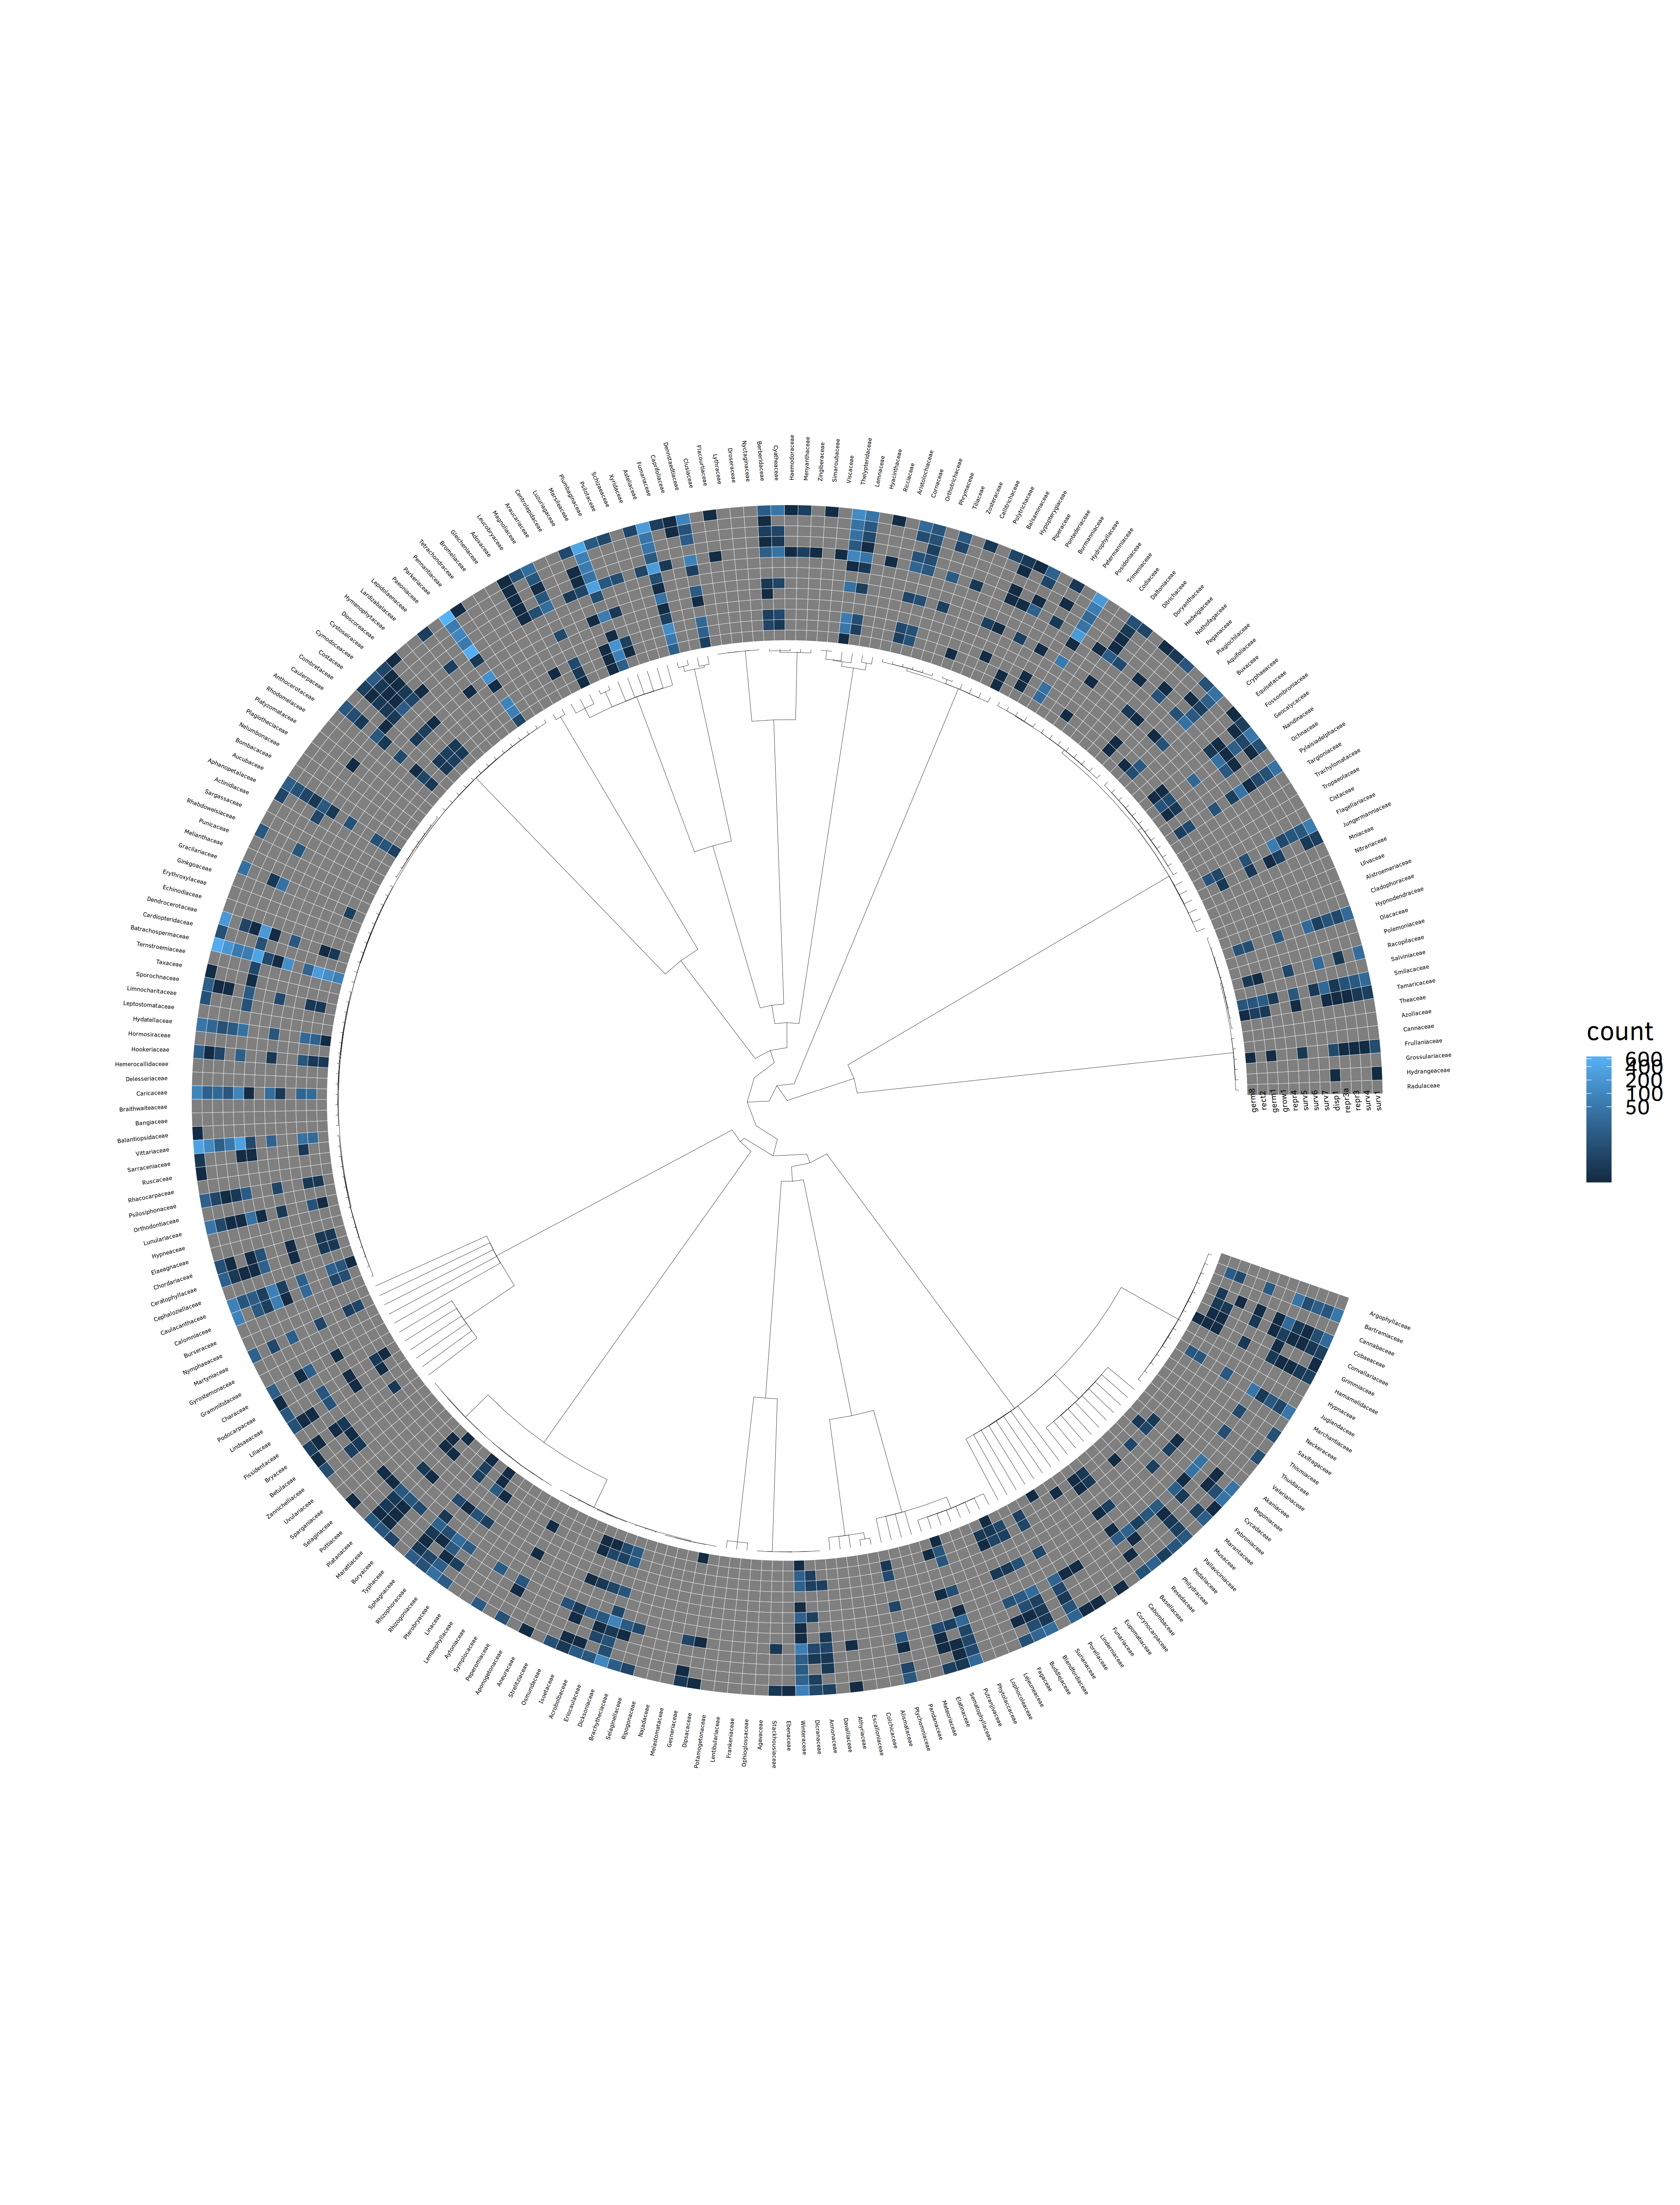

In [36]:
options(repr.plot.width=16, repr.plot.height=21, repr.plot.res=300)

gheatmap(base_tree, df, offset=1, width=.3,
               colnames_angle = 95, colnames_offset_y = 0.0001, 
         colnames_offset_x = 0, font.size = 2) + 
    theme(text = element_text(size = 18)) +
  scale_fill_gradient(name = "count", trans = "log",
                      breaks = my_breaks, labels = my_breaks) +
  geom_tiplab(align = TRUE, linesize = 0, offset = 50, size= 1.5)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in discrete y-axis”


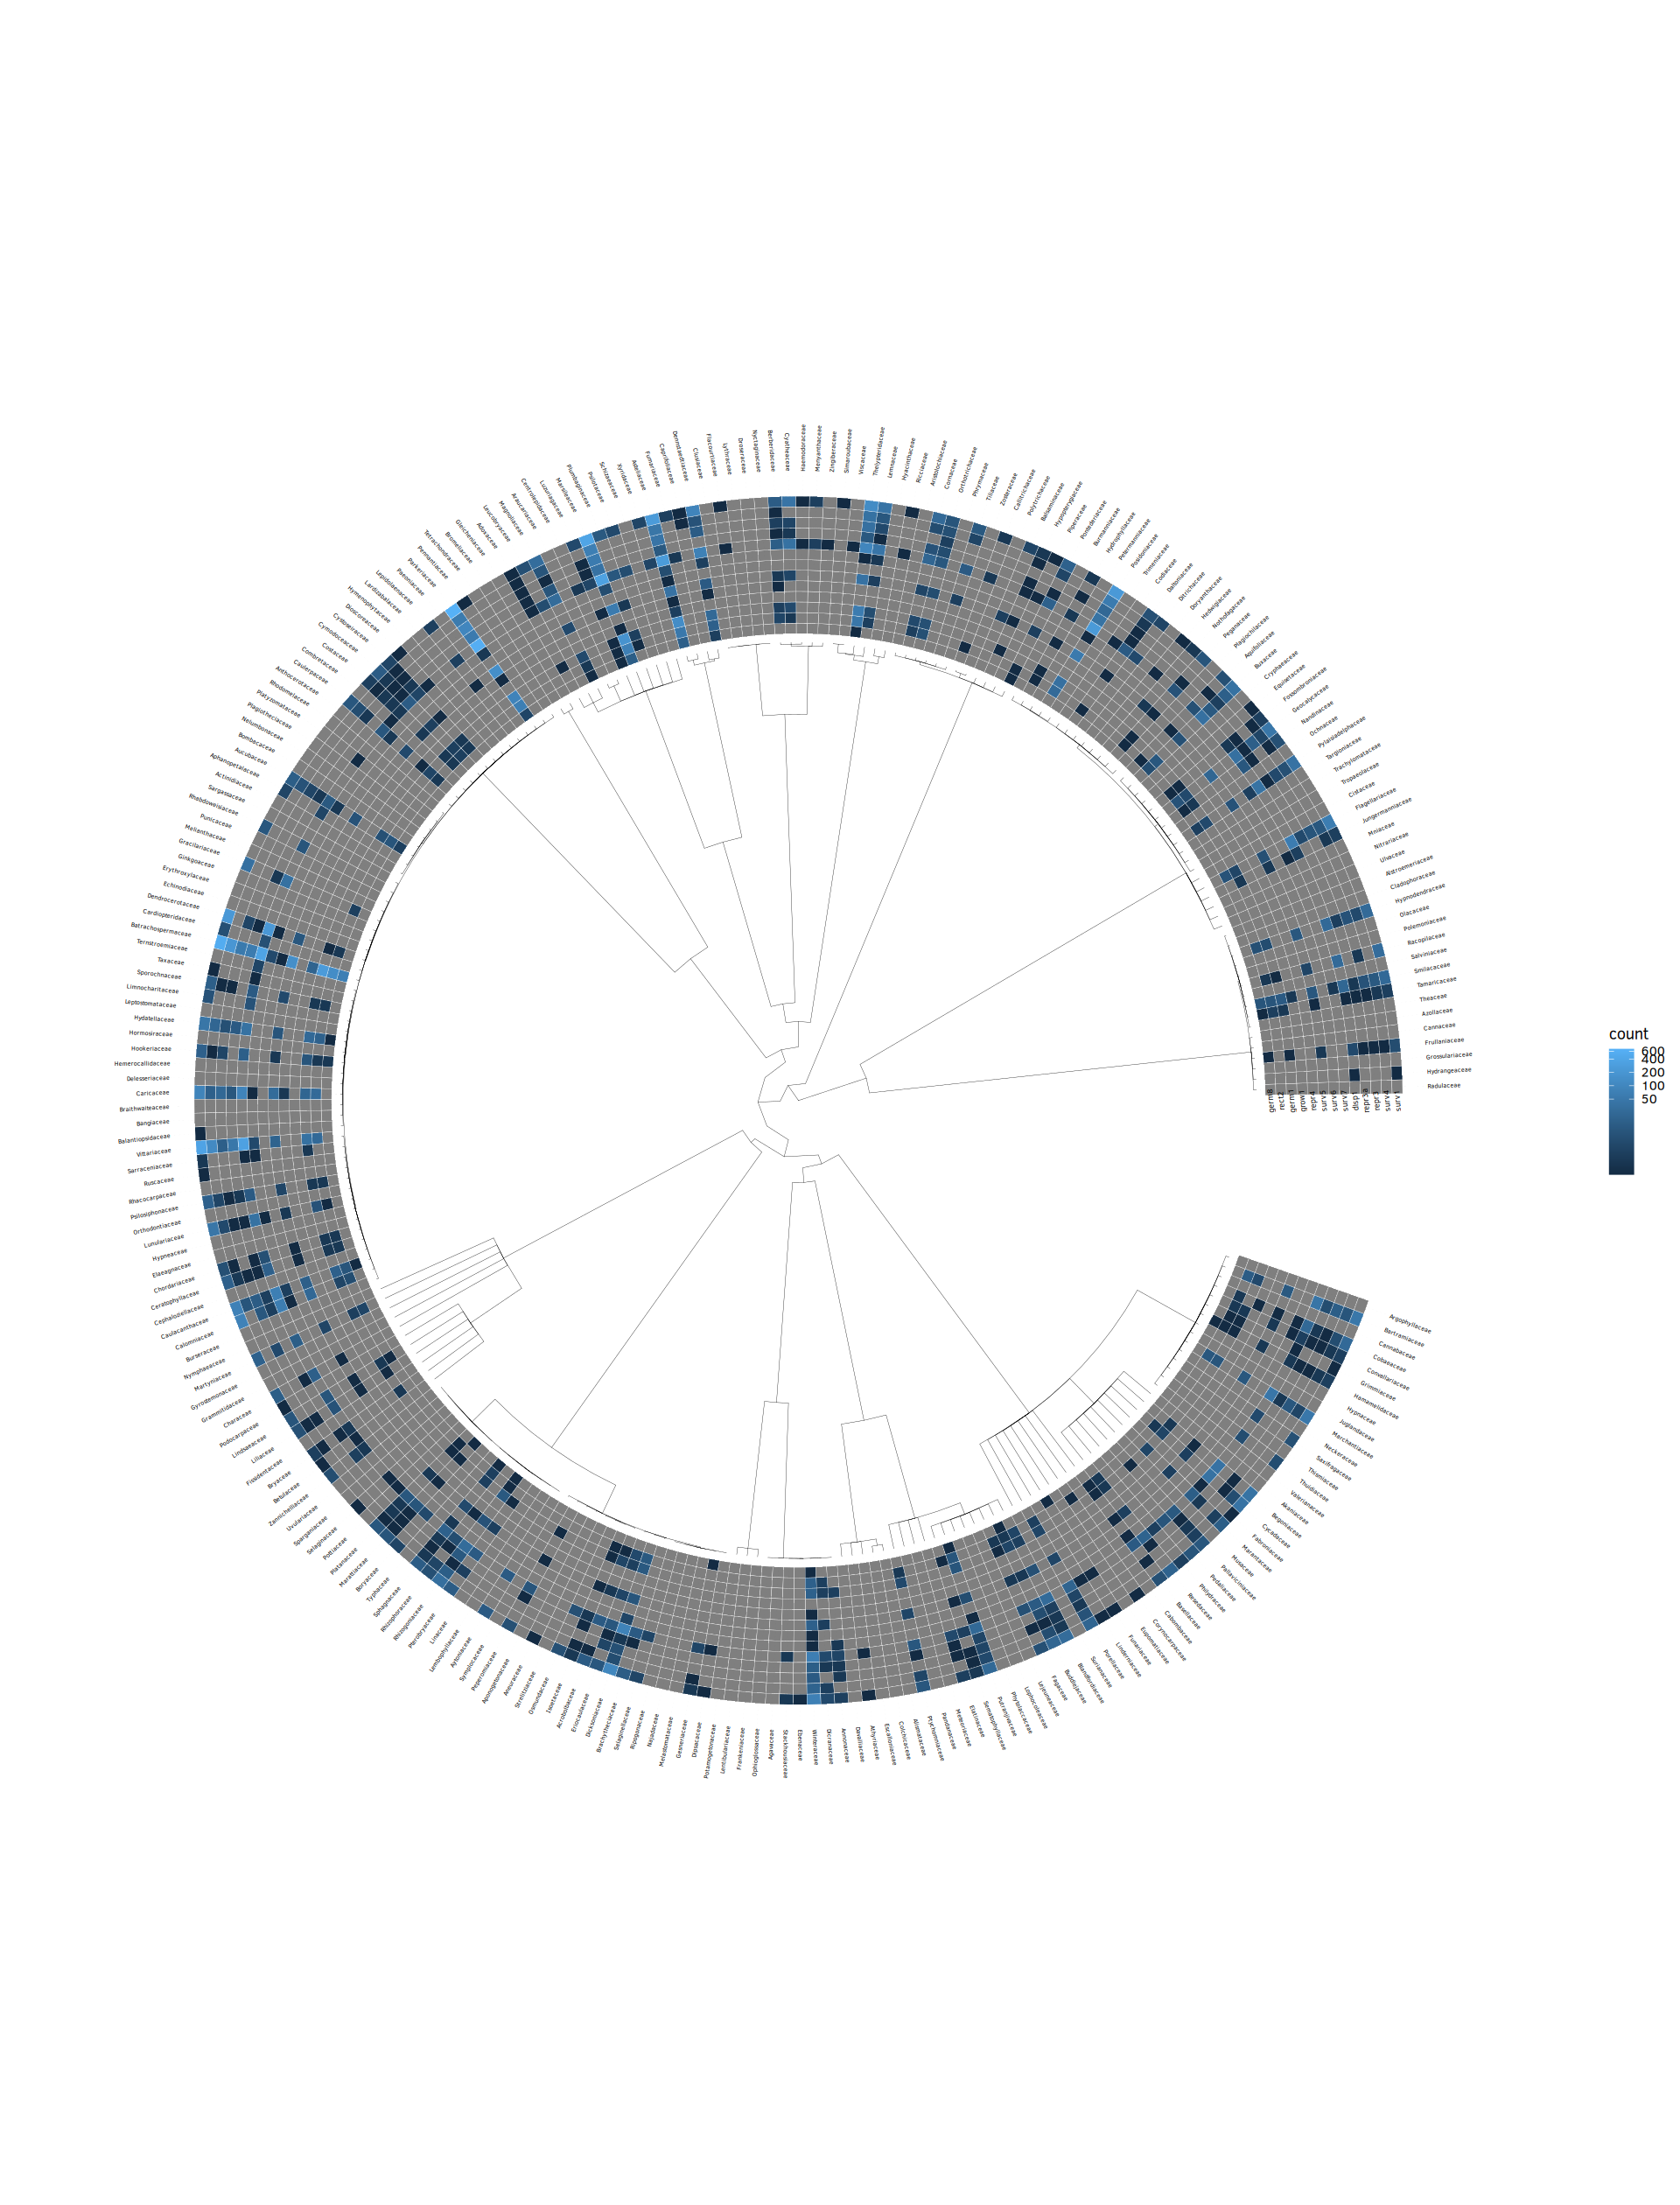

In [29]:
options(repr.plot.width=16, repr.plot.height=21)

gheatmap(base_tree, df, offset=1, width=.3,
               colnames_angle = 95, colnames_offset_y = 0.0001, 
         colnames_offset_x = 0, font.size = 2) + 
  scale_fill_gradient(name = "count", trans = "log",
                      breaks = my_breaks, labels = my_breaks) +
  geom_tiplab(align = TRUE, linesize = 0, offset = 50, size= 1.5)

In [ ]:
library(RPostgreSQL)
library(ggplot2)
library(forcats)
library(dplyr)
library(data.table)
library(rpostgis)
library(tidyverse)
library(ggtext)
library(stringr)
library(vcd)
library(lubridate)
library(scales)
library(ggrepel)

#Load survey data
my.survey <- read.csv("data/my.surveys.csv",sep=",",
                     header=T, dec=".", stringsAsFactors=F, na.strings=c("","NA", "N/A"))

#Summary table
my.survey  %>%  
  group_by(Survey.Name) %>%
  summarise(t.loc = n_distinct(site_label),
            t.obs = n_distinct(observer),
            t.days = n_distinct(visit_date),
            t.taxa = sum(taxa, na.rm = TRUE),
            t.plots = n_distinct(subplots)
  )


#Table with vegetation types
type.veg <- data.frame(table(unlist(strsplit(my.survey$veg," / "))))

type.veg %>%
  ggplot(aes(x=Var1, y=Freq)) +
  geom_bar(stat="identity")

#####
#Dumbbell Plot to vizualice relative positions 
#(like growth and decline) between two points in time.
#Now merge with fire information
my.fire<- read.csv("data/my.fire_20200316.csv",sep=",",
                   header=T, dec=".", stringsAsFactors=F, na.strings=c("","NA", "N/A"))

str(my.fire)

my.fire$visit_id <- as.factor(my.fire$visit_id)

#Transform date from character to date format
my.fire <-my.fire %>%
mutate(date = ymd(fire_date))

summary(my.fire$date)

#Fire events
my.fire %>%
group_by(visit_id) %>%
  summarise(fire = n_distinct(date))

#Totals
my.fire %>%
  select(date) %>%
  summarise(fire = n()) # 45 events of fire from 

#Temporal plot of fire events
tmp1 <- my.fire %>%
  mutate(date = ymd(fire_date)) %>%
  group_by(date) %>%
  summarise(n = n()) %>%
  mutate(csum=cumsum(n)) 

tmp1$date.fire <- tmp1$date


tmp1 <- tmp1 %>%
  separate(date.fire, c("year", "month", "day"))

#Define seasons base on months
tmp1$season <- ifelse (tmp1$month %in% c('12','01','02'), 
                      "SUMMER",
                      ifelse (tmp1$month %in% c('03','04','05'), 
                              "AUTUMN",
                              ifelse (tmp1$month %in% c('06','07','08'), 
                                      "WINTER",
                                      ifelse (tmp1$month %in% c('09','10','11'), 
                                              "SPRING", NA))))

tmp1 %>% 
  ggplot(aes(x = date, csum)) +
  geom_area() +
  labs(x = "", y = "Accumulated number of fire events") +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) +
  annotate("rect", xmin=c("1980-12-01", "1981-02-28"), xmax=c("1990-12-01", "1991-02-28"),
           ymin=c(0,50), ymax=c(0,50), alpha=0.2, color="blue", fill="blue")
  
geom_label_repel(aes(label = season), fontface = "bold")




#Lollipop
#Fire frequency
ggplot(my.fire, aes(days_since_fire, visit_id)) +
  geom_segment(aes(x = 0, y = visit_id, xend = days_since_fire, 
                   yend = visit_id), color = "grey50", size = 0.5) +
  geom_point(size = 1) +
  xlab ("Days since the last fire")+
  ylab ("")

